In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset and split into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to be compatible with CNN input (add channel dimension)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Define the CNN architecture
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(320, activation='relu'),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 320)            │     2,949,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │        16,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,984,816 (11.39 MB)

 Trainable params: 2,984,816 (11.39 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Train the model
history = model.fit(x_train, y_train, epochs=5
                    , batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 91s 52ms/step - accuracy: 0.9207 - loss: 0.2534 - val_accuracy: 0.9863 - val_loss: 0.0520
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.9879 - loss: 0.0384 - val_accuracy: 0.9852 - val_loss: 0.0533
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.9926 - loss: 0.0236 - val_accuracy: 0.9917 - val_loss: 0.0338
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 85s 50ms/step - accuracy: 0.9954 - loss: 0.0143 - val_accuracy: 0.9877 - val_loss: 0.0488
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 87s 52ms/step - accuracy: 0.9958 - loss: 0.0118 - val_accuracy: 0.9905 - val_loss: 0.0407


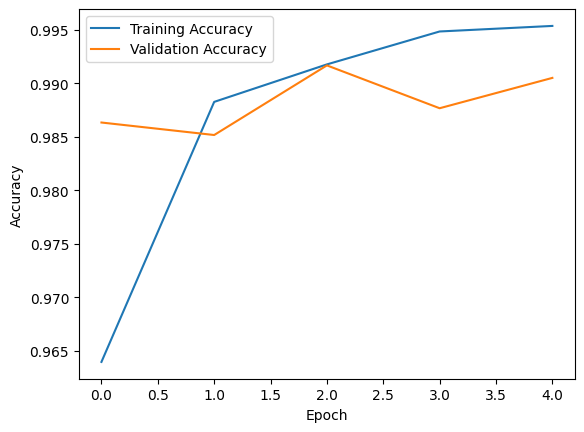

In [4]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [5]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9883000254631042


In [6]:
# Save the trained model
model.save("mnist_cnn_model.h5")

In [7]:
# Testing new image on the trained model

import cv2

# Load the trained model
model = tf.keras.models.load_model("mnist_cnn_model.h5")

# Function to preprocess the test image
def preprocess_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 28x28 (same size as MNIST digits)
    image = cv2.resize(image, (28, 28))

    # Normalize the pixel values to be between 0 and 1
    image = image / 255.0

    # Add a batch dimension to the image
    image = image.reshape(1, 28, 28, 1)

    return image

In [8]:
import cv2
import tensorflow as tf
import numpy as np

# Load the trained MNIST model
model = tf.keras.models.load_model("mnist_cnn_model.h5")

# Function to preprocess the test image
def preprocess_image(image_path):
    # Load the image as grayscale using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Image not found. Please check the path.")

    # Resize the image to 28x28 (MNIST standard size)
    image = cv2.resize(image, (28, 28))

    # Normalize the pixel values to [0, 1]
    image = image / 255.0

    # Add a batch dimension and channel dimension
    image = image.reshape(1, 28, 28, 1)

    return image




In [9]:
test_image_path='2img.png'

preprocessed_image = preprocess_image(test_image_path)

# Make predictions on the test image
predictions = model.predict(preprocessed_image)

# Get the predicted label (digit) from the model's output
predicted_label = tf.argmax(predictions, axis=1)[0].numpy()

print("Predicted Label:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Predicted Label: 2
